# Social Graphs 2017 Project Assignment B

## What Would be a Next Popular Manga in US? Using Sentiment Analysis and Similarity Analysis

## Part 1: Motivation

Japanese Manga is well-known as an one of Japanese Culture and loved by young people all over the world. In the US, where is a main market of manga outside of Japan, more and more manga have been published and popular: [“Death Note”](https://en.wikipedia.org/wiki/Death_Note), [“One-Punch Man”](http://onepunchman.wikia.com/wiki/One-Punch_Man_Wiki), and so on… and it is almost impossible to predict which Japanese manga would be next popular manga in US. In this article, we tried to predict a next popular manga by using two types of measurements : Similarity Analysis and Sentiment Analysis.

#### Dataset
We chose Wikipedia articles of japanese mangas as dataset for this project because wikiarticles have a variety of information from its plot to its marchandise and it is written on unbiased way which allows us to analyze the data without considering writers bias or unbalanceness between mangas.

Thus the dataset we chose is as follows:

* **English Wiki articles of best seller manga in US from 2009 to 2016**: We extracted New York Times Best Seller mangas from [a wikipedia page](https://en.wikipedia.org/wiki/List_of_The_New_York_Times_Manga_Best_Sellers) and collected wiki articles of them by using [MediaWiki API](https://www.mediawiki.org/wiki/API:Main_page).   We succeeded to collect 185 articles and the data size is about 5 MB.


* **Japanese Wiki articles of new-published manga in Japan from 2015 to 2017**: Extract new-published manga titles from Japanese Web service called [“hon no hikidashi (book’s drawer)”](http://hon-hikidashi.jp/enjoy/15948/) where posts a ranking of top 20 new-published manga in every 6-month since 2015. We succeeded to collect 100 titles from the web service and extract 36 wiki articles of them and the datasize if about 2 MB.

#### Our goal for this project
This project aims to understand what kind of manga became popular in US and get a hint to predict what types of manga would be popular in the future.

## Part2: Basic stats. Let's understand the dataset better

Here is a process how we processed dataset and extacted wiki articles of Best seller mangas (we call popular manga in this project) and New-published mangas:

### 1.**Use MediaWiki API to collect names of popular mangas from *"List of The New York Times Manga Best Sellers"* **

First we imported some libraries needed to data processing.

In [5]:
#Import some libraries
import urllib2
import json
import re
import pickle

Then in order to extract content of [List of The New York Times Manga Best Sellers](https://en.wikipedia.org/wiki/List_of_The_New_York_Times_Manga_Best_Sellers), set a query for each year's Mnaga Best Seller wiki page.   
We stored the contents as a dictionary type.

In [127]:
#Set a list of years form 2009 to 2016
year = [str(i) for i in range(2009,2017)]

# Set some basic parameters for a query
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

# Generate a empty dictionary
wiki_json =dict()

# For each year, set a title parameter and stored it to the dictionary as a json datatype.
for y in year:
    title="titles=The_New_York_Times_Manga_Best_Sellers_of_%s"%y
    query="%s&%s&%s&%s&%s" %(baseurl,action,title,content,dataformat)
    wikimangas = urllib2.urlopen(query).read()
    wikijsons[key]=json.loads(wikimangas)

### ** 2.Extract names of popular mangas from the wiki articles**  
After storing the contents, we extracted titles of the mangas by using re.findall function.  
In this process, because of a difference of writing format among 2009 to 2016 wiki articles, we used different patterns to extract the titles.

In [122]:
# Set a empty list
names_list =[]
# For each wiki article from 2009 to 2016, use re.findall function to ectract manga titles.
for key,item in wikijsons.items():
    # Access to a content of a wiki article.
    resource = item["query"]["pages"][item["query"]["pages"].keys()[0]]["revisions"][0].values()[0]
    
    # Extract manga titiles from 2009-2011 best sellers
    if int(key)<2012:
        pattern = r"\| \''\w+\''"
        result = [i[4:-2] for i in re.findall(pattern,resource)]
        names_list.extend(result)
     
    # Extract manga titiles from 2012 best sellers
    elif key == "2012":
        pattern= r"''\[\[.*?\]\]''"
        result = [i[4:-4] for i in re.findall(pattern,resource)]
        names_list.extend(result)
    
    # Extract manga titiles from 2013-2016 best sellers
    else:
        pattern = r"\|''\[\[.*?\]\]"
        result = [i[5:-2] for i in re.findall(pattern,resource)]
        names_list.extend(result)

# Make a set of manga titles
names_set = set(names_list)

In [6]:
# with open("pop_namelist.pickle","wb") as f:
#     pickle.dump(names_list,f)

### **3. Collect wiki articles of popular mangas**
Here we edited names of the mangas to use for extracting wiki articles of the mangas by using MediaWiki API.

In [124]:
# Set a empty list 
all_names = []
for i in names_set:
    # Replace space" " to underline "_"
    i = i.replace(r" ",r"_")
    
    # if the name has separater "|" , use a first part of the name, and append to the list.
    if "|" in i:
        all_names.append(i[:i.index("|")])
        
    # else, just append the name to the list
    else: all_names.append(i)

In [197]:
# Check the names
for i in all_names:
    print i

Omamori_Himari
The_Ancient_Magus'_Bride
Arisa_(manga)
Sword_Art_Online
Negima!_Magister_Negi_Magi
House_of_Five_Leaves
The_Legend_of_Zelda:_A_Link_to_the_Past
The_Earl_and_the_Fairy
Monster_Musume
Yu-Gi-Oh!_Zexal
Dengeki_Daisy
Neon_Genesis_Evangelion
Attack_on_Titan:_Before_the_Fall
The_Flowers_of_Evil_(manga)
Kannagi
Library_Wars
A_Certain_Scientific_Railgun
Pokémon_Adventures
Excel_Saga
Durarara!!
A_Bride's_Story
Oresama_Teacher
Battle_Angel_Alita:_Last_Order
Higurashi_When_They_Cry
Kamisama_Kiss
Sword_Art_Online
One-Punch_Man
Yu-Gi-Oh!_GX
Miles_Edgeworth:_Ace_Attorney
Nura:_Rise_of_the_Yokai_Clan
Twin_Spica
Case_Closed
The_Melancholy_of_Suzumiya_Haruhi-chan
Big_Hero_6_(film)
Pokémon_Adventures
Tenjho_Tenge
X_(manga)
Air_Gear
The_Melancholy_of_Haruhi_Suzumiya_(manga)
Missions_of_Love
Claymore
Magic_Knight_Rayearth
WataMote
The_Story_of_Saiunkoku
Naruto
Berserk
Black_Butler
Monster_Hunter_Orage
Soul_Eater_(manga)
Vampire_Knight
Blue_Exorcist
Blood_Lad
Puella_Magi_Madoka_Magica_(manga)

In [200]:
# Modify some tricky error for extracting a wiki article 
for num,name in enumerate(all_names):
    if name == u"Library_Wars:_Love_&_War":
        all_names[num] = u"Library_Wars"

After modifying the names, we used MediaWiki API again and stored the articles to <font color='red'>names_dict</font>.

In [201]:
# Set some basic parameters for a query
baseurl = "https://en.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&links&redirects&rvprop=content"
dataformat = "format=json"

# Generate a empty dictionary
names_dict = dict()
for name in all_names:
    
    # set a try-exept statement because some titles do not have wiki pages.
    try:
        title = "titles=%s"%name.encode("utf-8")
        query = "%s&%s&%s&%s&%s"%(baseurl,action,title,content,dataformat)
        name_json = json.loads(urllib2.urlopen(query).read())
        names_dict[name] = name_json["query"]["pages"][name_json["query"]["pages"].keys()[0]]["revisions"][0]["*"]
    except:
        pass

Here we succeeded to extract 149 wiki articles.

In [136]:
len(names_dict)

149

### Short discussion: wiki articles of popular mangas
A number of words of dataset is important factor to succeed to analyze natural language. If the number is too small, the analysis would be failure. Here we plotted a distribution of a number of characters for each popular manga's wiki article.

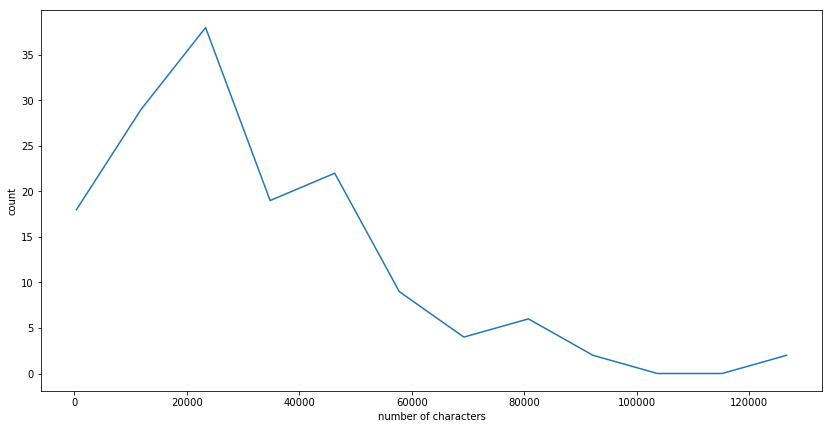

In [144]:
y,x = np.histogram([len(i) for i in names_dict.values()],bins="auto")
plt.figure(figsize=(14,7))
plt.plot(x[:-1],y),plt.ylabel("count"),plt.xlabel("number of characters")
plt.show()

As seen above most articles have enough words, however some articles have less than 1000 characters which means they have less than about 300 words. The number of the articles having small number of words are not so matters ( number is roughly 15), but still we need to consider this data would effect to analysis and need to remove them in case.

### 4.**Use Japnese Manga Web Service to collect names of new published mangas**
Extract new-published manga titles from Japanese Web service called [“hon no hikidashi (book’s drawer)”](http://hon-hikidashi.jp/enjoy/15948/) where posts a ranking of top 20 new-published manga in every 6-month since 2015.
We collected the names by copy&paste (it is ashameful..) and the names are as follows

In [145]:
Names = ["ものの歩","天野めぐみはスキだらけ！","天賀井さんは案外ふつう","美食探偵 明智五郎","フードファイタータベル","贄姫と獣の王","素敵な彼氏",\
        "ゆらぎ荘の幽奈さん","世界は中島に恋をする！！","キミとだけは恋に堕ちない","左門くんはサモナー","ヴァニタスの手記","スモーキン’パレヱド",\
        "恋と呼ぶには気持ち悪い","ショートケーキケーキ","惑わない星","僕と君の大切な話","炎炎ノ消防隊","プラチナエンド","テリトリーMの住人",\
        "百花万華鏡","青のフラッグ","ぼくたちは勉強ができない","渋谷金魚","ジンメン","怪物事変","ジャンク・ランク・ファミリー","斎王子兄弟に困らされるのも悪くない",\
        "間違った子を魔法少女にしてしまった","ヤンキーショタとオタクおねえさん","ばいばいリバティー","チョコレート・ヴァンパイア","魔王の秘書","なんでここに先生が！？",\
        "人形の国","幸色のワンルーム","不滅のあなたへ","CITY","とんがり帽子のアトリエ","憂国のモリアーティ","君は、オレが好きだって言ったらどんな顔するだろう。",\
        "ブラックナイトパレード","食糧人類－Starving Anonymous－","漫画家とヤクザ","柊様は自分を探している。","てをつなごうよ","八雲さんは餌づけがしたい。",\
        "海王ダンテ","VECTOR BALL","初恋の世界","約束のネバーランド","手品先輩","GAME～スーツの隙間～","龍帥の翼 史記・留侯世家異伝","さよなら私のクラマー",\
        "古見さんは、コミュ症です。","ファイアパンチ","双亡亭壊すべし","終末のハーレム","薫りの継承","君死ニタマフ事ナカレ","SP×ベイビー","なのは洋菓子店のいい仕事",\
        "同居人はひざ、時々、頭のうえ。","青楼オペラ","ハピネス_(押見修造の漫画)","兄に愛されすぎて困ってます","背すじをピン！と～鹿高競技ダンス部へようこそ～","ももくり",\
        "プランダラ","明日の３６００秒","恋降るカラフル～ぜんぶキミとはじめて～","カツカレーの日","雪花の虎","空母いぶき","午前０時、キスしに来てよ",\
        "椿町ロンリープラネット","はたらく細胞","思い、思われ、ふり、ふられ"]

### 5.**Collect Japnese Wiki articles of new published mangas**
Same as we did when collect wiki articles of popular mangas, we used MediaWiki API to extract wiki articles of new-published mangas.  
And stored them to <font color='red'>new_manga_dict</font>.

In [147]:
# Set some basic parameters for a query to Japanese Wikipedia
baseurl = "https://jp.wikipedia.org/w/api.php?"
action = "action=query"
content = "prop=revisions&rvprop=content"
dataformat = "format=json"

# Generate a empty dictionary
new_manga_dict = dict()
for name in Names:
    try:
        # set a try-exept statement because some titles do not have wiki pages.
        name = name.replace(r" ",r"_")
        title = "titles=%s"%name
        query = "%s&%s&%s&%s&%s"%(baseurl,action,title,content,dataformat)
        name_json = json.loads(urllib2.urlopen(query).read())
        new_manga_dict[name] = name_json["query"]["pages"][name_json["query"]["pages"].keys()[0]]["revisions"][0]["*"]
    except:
        pass

Here we succeeded to extract 37 wiki articles out of 100 titles.

In [148]:
print len(new_manga_dict)

37


After this, we translated each Japanese wiki article to English to analyze and save it as a new_manga_en_dict.

In [202]:
with open("./translated_dict.pickle","rb") as f:
    new_manga_en_dict = pickle.load(f)

---

## Part3: Tools, theory and analysis

### Similarity Analysis
First theory we used for this project is **Similarity Analysis** which is well unkown as **Cosine Similarity**.
- Cosine Similarity
>The cosine similarity is a measure of the angle between two vectors, normalized by magnitude. You just divide the dot product by the magnitude of the two vectors.
>By taking the algebraic and geometric definition of the dot product, we get the cosine similarity that is a normalized dot product of two vectors.  
** If the angle is small (they share many tokens in common), the cosine is large.  
If the angle is large (and they have few tokens in common), the cosine is small**. (*from [Gerardnico](https://gerardnico.com/wiki/data_mining/cosine_similarity)*)

So we define a similarity of each new-published manga as a average distance from the new-published manga to popular mangas.
And in order to apply cosine similarity to this dataset we used **TF-IDF vectorizer** function from sklearn library.
- TF-IDF
>tf–idf, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus.  
It is often used as a weighting factor in information retrieval and text mining.  
The tf-idf value increases proportionally to the number of times a word appears in the document, but is offset by the frequency of the word in the corpus, which helps to control for the fact that some words are generally more common than others.

The process of Similarity Analysis is as follows:
1.  Cleaning the dataset. Remove stop words, numbers, and punctuation.
2.  Generate TF-IDF vector for each popular and new-published manga.
3.  Calculate average distance between each new-published manga and popular mangas.

### 1. Cleaning the dataset. Remove stop words, numbers, and punctuation.
To create TF-IDF vector, we need to remove some stop words from contents.   
So we downloaded stop_words.txt. Also we remove numbers and some panctuations.

In [12]:
# Load stop words
f = open("./../assignment2/stop_words.txt","r")
stop_words = [i[:-1].replace("'","") for i in f.readlines()]
f.close()

In [151]:
# Clean dataset of popular mangas
# Set a empty dictionary
words_pop_manga = dict()
# Clean dataset of popular mangas
for num,(key,value) in enumerate(names_dict.items()):
    #replace space characters to single space
    texts = re.sub(r"\s"," ",value)
    #replace numbers and some punctuation to single space
    texts = re.sub(r"[|}{%&#0-9?'\"_,\.;:\[\]\(\)-=><^\\*]"," ",texts)
    # lower the text and split it and generate a list
    texts = texts.lower().split()
    # remove stopwords and single charachters like "a" or"n"
    texts = [i for i in texts if i not in stop_words and  len(i)>1]
    # Add it to the dictionary
    words_pop_manga[key]=set(texts)

In [152]:
# Clean dataset of popular mangas
# Set a empty dictionary
words_new_manga = dict()
# Clean dataset of new-published mangas
for num,(key,value) in enumerate(new_manga_en_dict.items()):
    #replace space characters to single space and decode it to utf-8
    texts = re.sub(u"\s"," ",value).decode("utf-8")
    #replace other space charachter used in utf-8 to single space
    texts = re.sub(u"\xa0",u" ",texts)
    #replace numbers and some punctuation to single space
    texts = re.sub(r"[|}{%&#0-9?'\"_,\.;:\[\]\(\)-=><^\\*]"," ",texts)
    # lower the text
    texts = texts.lower()
    # split texts by space (from single space to multiple space)
    texts = re.split(r" +",texts)
    # remove stopwords and single charachters like "a" or"n"
    texts = [i for i in texts if i not in stop_words and  len(i)>1]
    words_new_manga[key]=set(texts)

### 2. Generate TF-IDF vector for each popular and new-published manga.
In order to compute TF-IDF vector, we used TfidfVectorizer from sklearn library.

In [158]:
#prepare input texts
input_texts = [" ".join(i) for i in words_pop_manga.values()]+[" ".join(i) for i  in words_new_manga.values()]

In [159]:
# compute TF-IDF vectors
from sklearn.feature_extraction.text import TfidfVectorizer 
vectorizer = TfidfVectorizer(use_idf=True ,analyzer='word')
vecs = vectorizer.fit_transform(input_texts)

In [170]:
#compute cosine similarity
cos_values = dict()
from sklearn.metrics.pairwise import cosine_similarity
for key,new_manga in zip(words_new_manga.keys(),range(149,185)):
    value =[cosine_similarity(vecs[new_manga], vecs[i])[0][0] for i in range(149)]
    cos_values[key] = value

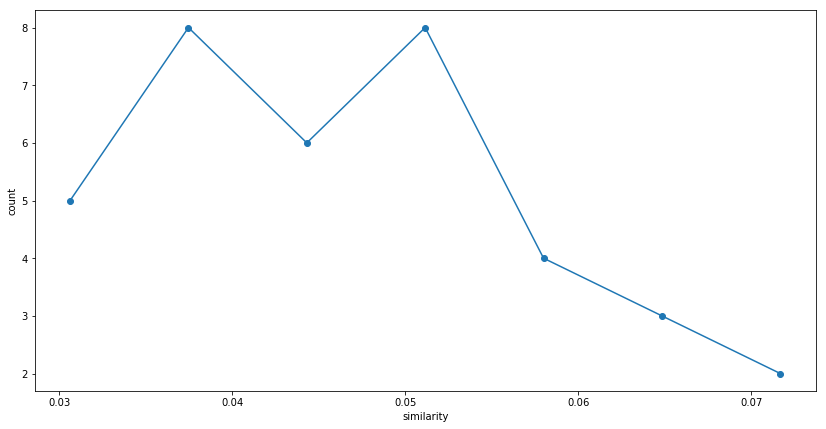

In [174]:
# plot a distribution of cosine similarity
y,x = np.histogram([sum(i)/len(i) for i in cos_values.values()],bins="auto")
plt.figure(figsize=(14,7))
plt.plot(x[:-1],y,"o-")
plt.ylabel("count"),plt.xlabel("similarity")
plt.show()

As a result of similarity analysis with the method: TF-IDF Vector and Cosine Similarity, a distribution of similarities for each new-published manga looks like in figure3 (can be seen below). The minimum value is about 0.03 and maximum value is about 0.08, thus the highest value is twice as high as the lowest one. Top 3 mangas are Promised Never Land (score: 0.0785), Samon-kun wa Summoner (score: 0.0735), and World’s End Harem (score: 0.071). After the other analysis, which is Sentiment Analysis, we compared the result with the other one.

### Sentiment Analysis
>Generally speaking, sentiment analysis aims to determine the attitude of a speaker, writer, or other subject with respect to some topic or the overall contextual polarity or emotional reaction to a document, interaction, or event. The attitude may be a judgment or evaluation (see appraisal theory), affective state (that is to say, the emotional state of the author or speaker), or the intended emotional communication (that is to say, the emotional effect intended by the author or interlocutor). referred from [wikipedia](https://en.wikipedia.org/wiki/Sentiment_analysis)

Basically sentiment analysis is for estimate a judgement or evaluation of writers,  
however it would be also for judging given texts are negative/positive or find some trends among them even they are wikipedia articles.   
So we decided to use this method to analyze our topic deeper and more in detail.

In this process we used [SentimentIntensityAnalyzer](http://www.nltk.org/api/nltk.sentiment.html) which allows us to use a lexicon to analyze sentiment of a given texts and function to compute the sentiment.

Our process of Sentiment Analysis is as follows:

1.Compute a sentiment for popular manga and new-published manga  
2.Find out what kind of new-published manga is similar to popular mangas by plotting scattering plot.

### 1. Compute a sentiment for popular manga and new-published manga
We computed values of sentiment for popular mangas by using SentimentIntnesityAnalyzer

In [188]:
# Import a library
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()
#set a empty dictionary
sentiment_pop =dict()

#for each pop manga, compute a value of sentiment and add it to dictionary
for key,value in words_pop_manga.items():
    sentiment_pop[key]=vader_analyzer.polarity_scores(" ".join(list(value)))

In [189]:
# as same as we did for popular mangas
from nltk.sentiment.vader import SentimentIntensityAnalyzer
vader_analyzer = SentimentIntensityAnalyzer()
sentiment_new =dict()
for key,value in words_new_manga.items():
    sentiment_new[key]=vader_analyzer.polarity_scores(" ".join(list(value)))

In [185]:
# check some generated data
for num,(name,value) in enumerate(sentiment_new.items()):
    if num<10 :
        print name,value

ものの歩 {'neg': 0.137, 'neu': 0.693, 'pos': 0.169, 'compound': 0.9907}
思い、思われ、ふり、ふられ {'neg': 0.056, 'neu': 0.644, 'pos': 0.3, 'compound': 0.9989}
古見さんは、コミュ症です。 {'neg': 0.108, 'neu': 0.73, 'pos': 0.162, 'compound': 0.9968}
VECTOR_BALL {'neg': 0.198, 'neu': 0.656, 'pos': 0.146, 'compound': -0.9962}
明日の３６００秒 {'neg': 0.105, 'neu': 0.76, 'pos': 0.135, 'compound': 0.8396}
カツカレーの日 {'neg': 0.084, 'neu': 0.771, 'pos': 0.144, 'compound': 0.9062}
炎炎ノ消防隊 {'neg': 0.161, 'neu': 0.707, 'pos': 0.132, 'compound': -0.9914}
不滅のあなたへ {'neg': 0.088, 'neu': 0.76, 'pos': 0.151, 'compound': 0.9001}
約束のネバーランド {'neg': 0.163, 'neu': 0.675, 'pos': 0.162, 'compound': -0.5967}
空母いぶき {'neg': 0.148, 'neu': 0.744, 'pos': 0.108, 'compound': -0.9976}


The output of sentiment analysis contains 4 types of value:  
"neg" : it means "negative" and how often negative words appered in a text  
"pos" : it means "positive" and how often positive words appered in a text  
"neu" : it means "neutral" and how often neutral words appered in a text  
"compound" : it means the sintiment intensity of a given text. If it is around 1, the text is strongly positive.

### 2.plotting scattering plot.

We tried to find out what kind of new-published manga is similar to popular mangas by plotting scattering plot

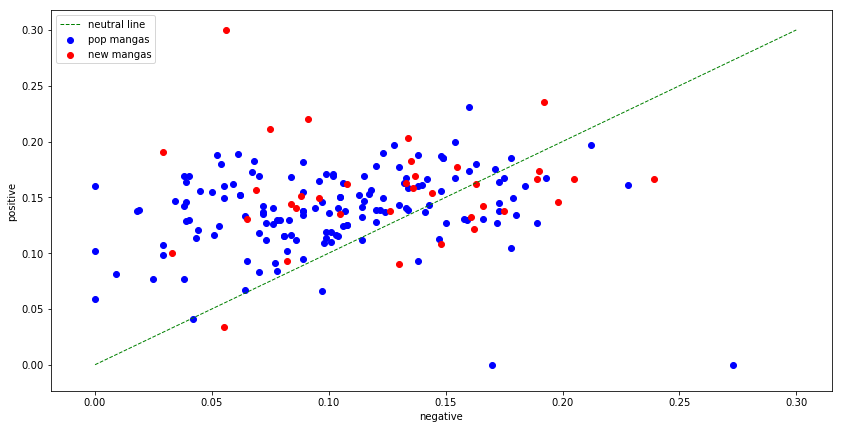

In [195]:
# plot scattering plot
import matplotlib.pyplot as plt
# set x,y for negative/positive value of popular mangas
x = [i["neg"] for i in sentiment_pop.values()]
y = [i["pos"] for i in sentiment_pop.values()]
# set x_,y_ for negative/positive value of new-published mangas
x_= [i["neg"] for i in sentiment_new.values()]
y_ = [i["pos"] for i in sentiment_new.values()]
plt.figure(figsize=(14,7))
plt.scatter(x,y,color="b",label="pop mangas")
plt.scatter(x_,y_,color="r",label="new mangas")
plt.plot([0, 0.3], [0, 0.3], 'g--', lw=1,label="neutral line")
plt.xlabel("negative"),plt.ylabel("positive")
plt.legend()
plt.show()

In the figure, pop mangas are plotted as blue points and new-published mangas are as red points. Plus a border between negative area and positive area are shown as a green dash line.  
When look closer to a positive area and a negative area separated by the neutral line, it clearly turned out that a proportion of positive pop manga (124/ 149) is larger than that of positive new-published manga (23 /36).  

In [192]:
print len([None for i in sentiment_pop.values() if i["neg"]-i["pos"] > 0])
print len([None for i in sentiment_new.values() if i["neg"]-i["pos"] > 0])

25
13


In [191]:
arr = np.array([[149-25,25,149],[36-13,13,36]])
df = pd.DataFrame(arr,index=["pop mangas","new-published mangas"],columns=["positive","negative","total"])
df

,positive,negative,total
pop mangas,124,25,149
new-published mangas,23,13,36


Considered the findings, we can say it is likely that manga having positive value become popular manga. However, it is not possible to evaluate a similarity of new-published manga with pop mangas and find out which new-published manga would be a popular manga.

## Part4. Discussion

** As a result of similarity analysis and sentiment analysis, we compared the positive/negative value and value of similarity for top 3 manga titles that we found in similarity analysis.**

In [196]:
arr = np.array([[sentiment_new["約束のネバーランド"]["pos"],sentiment_new["約束のネバーランド"]["neg"],sum(cos_values["約束のネバーランド"])/149],\
              [sentiment_new["左門くんはサモナー"]["pos"],sentiment_new["左門くんはサモナー"]["neg"],sum(cos_values["左門くんはサモナー"])/149],\
              [sentiment_new["終末のハーレム"]["pos"],sentiment_new["終末のハーレム"]["neg"],sum(cos_values["終末のハーレム"])/149]])
df = pd.DataFrame(arr,index=["Promised Never Land","Samon-kun wa Sumonner","World End Harem"],columns=["positive","negative","similarity"])
df

,positive,negative,similarity
Promised Never Land,0.162,0.163,0.078530
Samon-kun wa Sumonner,0.166,0.205,0.073545
World End Harem,0.163,0.133,0.070989


Here this table shows it is not always true that high similarity manga has positive value, for example a manga called “Samon-kun wa Sumonner” has negative value more than positive value. 
So is it failed to predict what kind of manga would be popular manga ? We don’t conclude it is failure and listed some reason why this result did came out.

### Sentiment Analysis

>Generally speaking, sentiment analysis aims to determine the attitude of a speaker, writer, or other subject with respect to some topic or the overall contextual polarity or emotional reaction to a document, interaction, or event.

Basically, Sentiment Analysis is used for some comments or reviews written by a person and Wiki articles are written by anonymous people and the people try to write them from unbiased view, thus it is difficult to calculate values of sentiment for wiki articles.  
**For further analysis it would be better way to use twitter database and extract tweets related to each manga title.**


### Similarity Analysis

It can be say that we **succeeded** to calculate value of similarity for new-published manga titles.  
**However**  the maximum value of similarity is quite small ( the value is 0.08). If it is truly similar to popular mangas, value of similarity would be around 0.7~1.0. One of the reason why this happened is that wikipedia articles have a lot of unnecessary information, for example information about merchandise or media of a manga. Similarity analysis needs to extract only plot or explanation of its characters for more precise analysis.